In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colorbar import Colorbar
from matplotlib import colors
from scipy import special
from mycolorpy import colorlist as mcp
from pathlib import Path
import matplotlib as mpl


plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{xcolor}"
plt.rcParams["font.family"] = "lmodern"

In [7]:
cwd = Path().resolve()
project_root = cwd.parent

data_equilibrium_dir = project_root / "data" / "equilibrium"
data_quench_dir = project_root / "data" / "quench"
plot_dir = project_root / "plot"

In [8]:
def comparison_data_entropy_at_equilibrium_with_various_coeff():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Entr2 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k08.txt")
    Entr3 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k09.txt")
    Entr4 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k095.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium in the thermodynamic limit", fontsize=20)

    ax1.scatter(xvals, Entr1, color="red", marker='o', label=r"$w/v = 0.70$")
    ax1.scatter(xvals, Entr2, color="orange", marker='o', label=r"$w/v = 0.8$")
    ax1.scatter(xvals, Entr3, color="green", marker='o', label=r"$w/v = 0.9$")
    ax1.scatter(xvals, Entr4, color="blue", marker='o', label=r"$w/v = 0.95$")
    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")

    ax1.tick_params(direction="in", labelsize=15)

    ax1.legend(loc='best', fontsize=10)

    plt.show()

    fig.savefig(plot_dir/"entropy_vs_NA_equilibrium_thermodynamic_limit.pdf", bbox_inches='tight')

## Entropy scaling in the thermodynamic limit

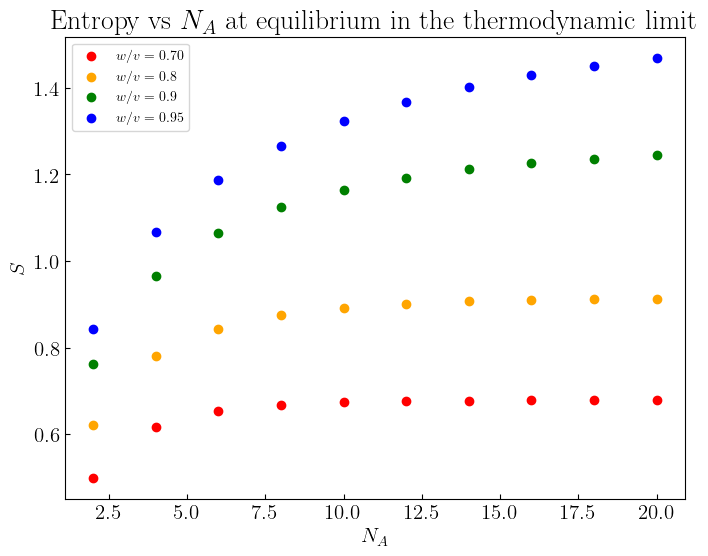

In [9]:
comparison_data_entropy_at_equilibrium_with_various_coeff()

## Entropy vs Variance in thermodynamic limit for v/w = 0.7

In [10]:
def comparison_data_entropy_vs_var_equilibrium_thermo():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Var = np.loadtxt(data_equilibrium_dir/"variance_10_cells_thermodynamic.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the thermodynamic limit", fontsize=20)
    
    ax1.scatter(xvals, Entr1, color="red", marker='o')
    ax2.scatter(xvals, Var, color="blue", marker='o')


    ax1.set_ylabel(r"$S$", fontsize=20, color="black")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")
    ax1.set_xlabel(r"$N_{A}$", fontsize=20)

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_variance_equilibrium_thermolimit.pdf", bbox_inches = 'tight')


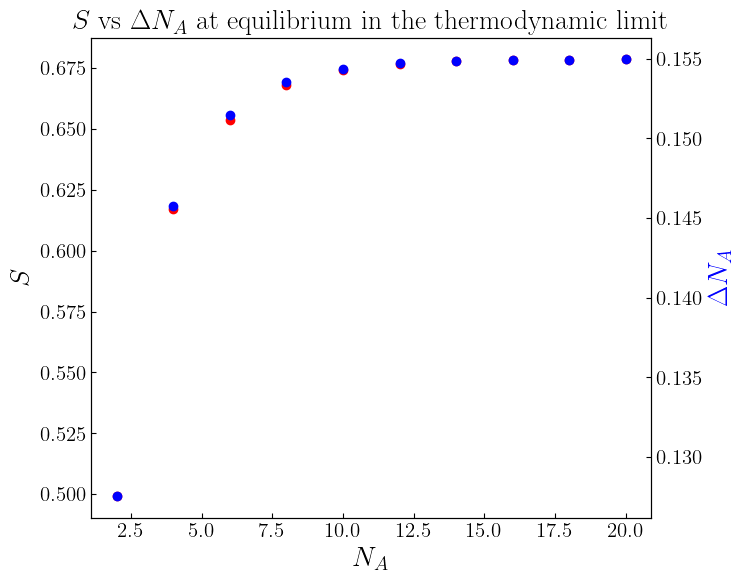

In [11]:
comparison_data_entropy_vs_var_equilibrium_thermo()

## Entropy in a single cell

In [12]:
from scipy.special import ellipk, ellipe
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

def comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff():
    w_values = np.linspace(0.000, 4.000, int(round((4.000 - 0.000)/0.01)) + 1)
    entropy = np.loadtxt(data_equilibrium_dir/"entropy_1_cell_thermodynamic_comparison_hop_coeff.txt")
    # The "Vectorized" way - No loop needed!
    # 1. Calculate all m parameters at once
    m_params = (4 * w_values) / ((1 + w_values) ** 2)

    # 2. Calculate all Integrals at once
    Ks = ellipk(m_params)
    Es = ellipe(m_params)

    # 3. Calculate all correlations at once
    corr_AB = ((w_values - 1) * Ks - (w_values + 1) * Es) / (2 * np.pi)
    
    
    lambda_1 = 0.5 + corr_AB
    lambda_2 = 0.5 - corr_AB
    entropy_corr = - 2 * (lambda_1 * np.log(lambda_1) + lambda_2 * np.log(lambda_2))

    fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
    ax.plot(w_values, entropy, color='blue', marker = '^', ms = '2' , label='Numerical result', linestyle='None')
    ax.plot(w_values, entropy_corr, color='orange', marker = 'None', label='Analytical result', linestyle='dashed')
    ax.set_title(r"Entropy of one cell at equilibrium vs hop coefficient", fontsize=18)
    ax.set_xlabel(r"$w$", fontsize=20)
    ax.set_ylabel(r"$S/v$", fontsize=20)
    ax.tick_params(direction="in", labelsize=15)
    ax.vlines(x=1.0, ymin=0, ymax=3.5, colors='red', linestyles='dashed', label=r'Topological phase transition ($w=v$)')
    ax.grid(True)
    ax.hlines(y=2 * np.log(2), xmin=0, xmax=4.0, colors='green', linestyles='dotted', label=r'$S = 2 \ln(2)$')
    ax.legend(loc='best', fontsize=10)
    
    axins = zoomed_inset_axes(ax, zoom=10, loc='lower right')
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", linestyle='--')

    axins.plot(w_values, entropy, color='blue', marker = '^', ms = '4' , linestyle='None')
    axins.plot(w_values, entropy_corr, color='orange', marker = 'None', linestyle='dashed')
    axins.hlines(y=2 * np.log(2), xmin=0, xmax=4.0, colors='green', linestyles='dotted')
    x1, x2 = 3.7, 4.0
    y1, y2 = 1.35, 1.41

    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    axins.xaxis.get_major_locator().set_params(nbins=6)
    axins.yaxis.get_major_locator().set_params(nbins=6)
    axins.set_xticklabels([])
    axins.set_yticklabels([])
    axins.tick_params(axis='both', bottom=False, left=False)

    
    axins.grid(True)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_hop_coeff_equilibrium.pdf", bbox_inches='tight')


/tmp/ipykernel_117833/2463980637.py:16: RuntimeWarning: invalid value encountered in multiply
  corr_AB = ((w_values - 1) * Ks - (w_values + 1) * Es) / (2 * np.pi)
/tmp/ipykernel_117833/2463980637.py:21: RuntimeWarning: divide by zero encountered in log
  entropy_corr = - 2 * (lambda_1 * np.log(lambda_1) + lambda_2 * np.log(lambda_2))
/tmp/ipykernel_117833/2463980637.py:21: RuntimeWarning: invalid value encountered in multiply
  entropy_corr = - 2 * (lambda_1 * np.log(lambda_1) + lambda_2 * np.log(lambda_2))


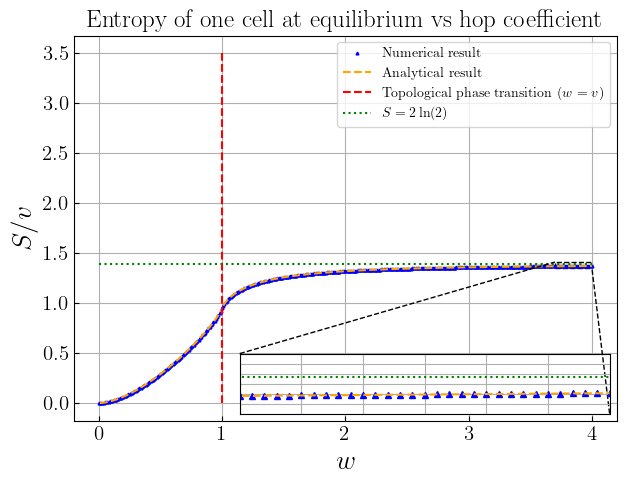

1.3862943611198906


In [13]:
comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff()
print(2 * np.log(2))

## Entropy scaling with system size for various hop coefficients

In [14]:
def comparison_data_entropy_equilibrium_with_various_hop_coefficients():
    coeffs = [0.5, 0.6, 0.9, 0.95, 0.98]
    colors = ["red", "orange", "green", "blue", "purple"]

    xvals = np.arange(2, 202, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        data = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        ax1.scatter(xvals, data, color=color, marker="o", s=7, label=fr"$w/v = {w}$")

    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")
    ax1.tick_params(direction="in", labelsize=15)
    ax1.legend(loc="center", fontsize=12, bbox_to_anchor=(0.5, 0.35), ncol=3)
    ax1.grid()

    plt.show()
    fig.savefig(plot_dir / "entropy_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

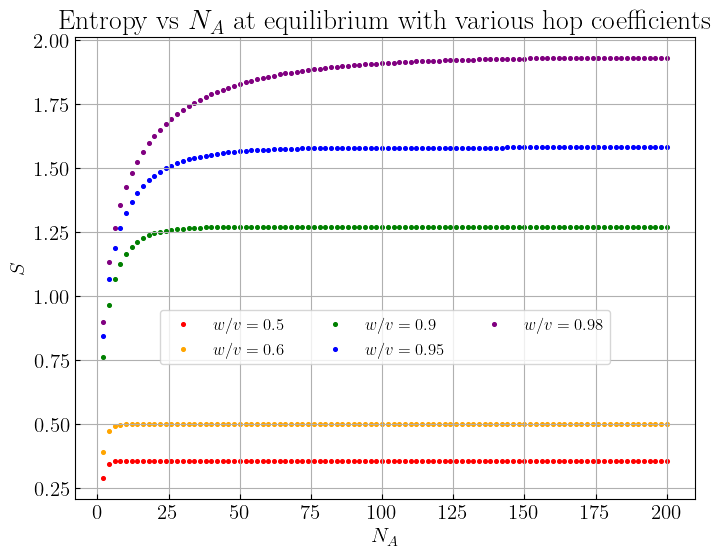

In [15]:
comparison_data_entropy_equilibrium_with_various_hop_coefficients()

## Entropy and variance scaling against subsystem size

In [16]:
def plot_entropy_variance_ratio_for_different_hop_coefficients():
    coeffs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
    colors = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "pink", "gray", "cyan"]
    xvals = np.arange(2, 202, 2)
    y_const = (np.pi**2)/3  # Constant line for comparison

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$S/\Delta N_{A}$ vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        entropy = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        variance = np.loadtxt(data_equilibrium_dir / f"variance_200_cells_noflux_k{w}.txt")
        ratio = entropy / variance
        ax.plot(xvals, ratio, color=color, label=fr"$w/v = {w}$")
    ax.plot(xvals, np.full_like(xvals, y_const, dtype=float), ls="--", label=fr"$\pi^2/3 \approx {y_const:.2f}$")
    
    ax.set_xlabel(r"$N_A$", fontsize=15)
    ax.set_ylabel(r"$S/\Delta N_{A}$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.legend(loc="center", fontsize=12, bbox_to_anchor=(1.15, 0.5), ncol=1)
    ax.grid()

    plt.show()
    fig.savefig(plot_dir / "entropy_variance_ratio_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

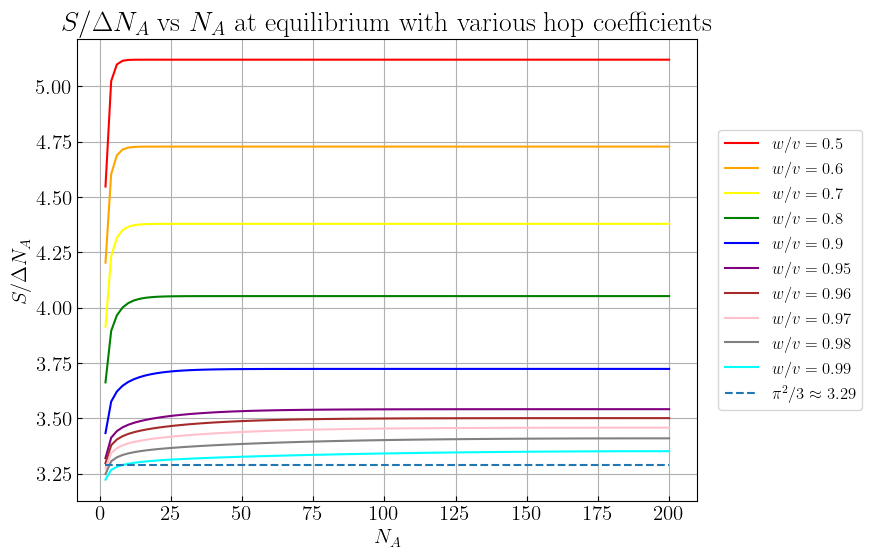

In [17]:
plot_entropy_variance_ratio_for_different_hop_coefficients()

## Correlation functions

In [18]:
def plot_correlation_data_as_distance_increase():
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"Correlation as a function of $l = j-j'$", fontsize=15)
    xvals = np.arange(0, 51, 1)

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.plot(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    ax.legend(loc="upper right", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$|\langle c_{j,A}^\dagger c_{j',B} \rangle|$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.grid()

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance.pdf", bbox_inches = 'tight')

In [19]:
def plot_correlation_data_as_distance_increase_semilogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"Correlation as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.semilogy(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$|\langle c_{j,A}^\dagger c_{j',B} \rangle|$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.grid()

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_semilogy.pdf", bbox_inches = 'tight')

In [20]:
def plot_correlation_data_as_distance_increase_loglogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"Correlation as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.loglog(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$|\langle c_{j,A}^\dagger c_{j',B} \rangle|$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.grid()

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_loglog.pdf", bbox_inches = 'tight')

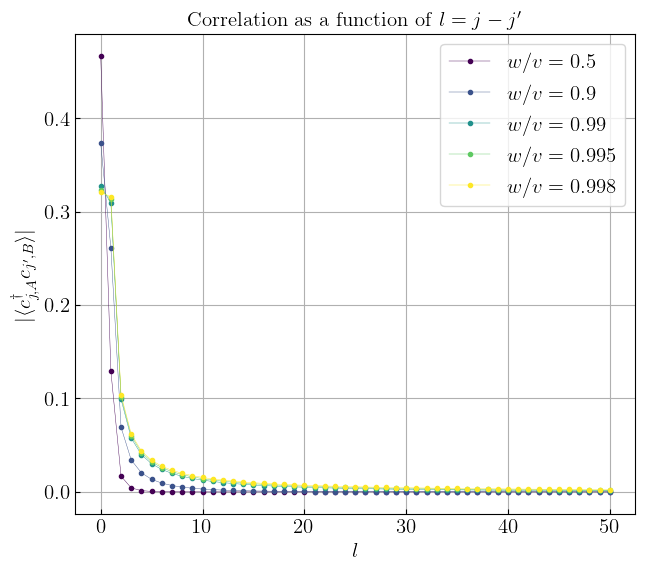

In [21]:
plot_correlation_data_as_distance_increase()

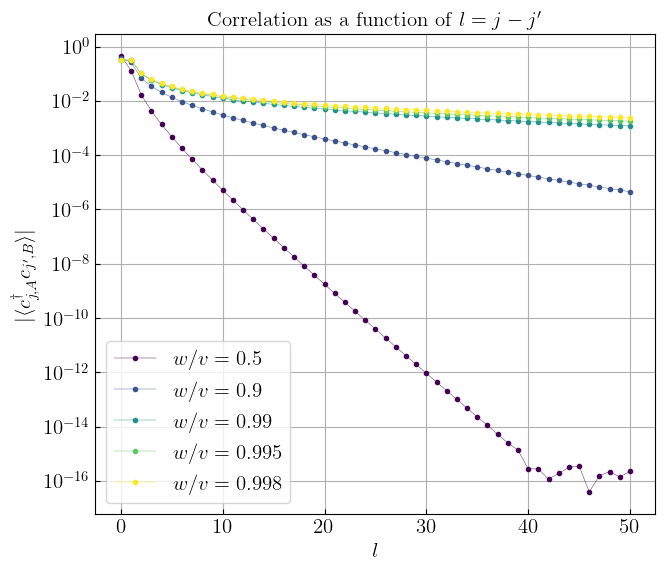

In [22]:
plot_correlation_data_as_distance_increase_semilogy()

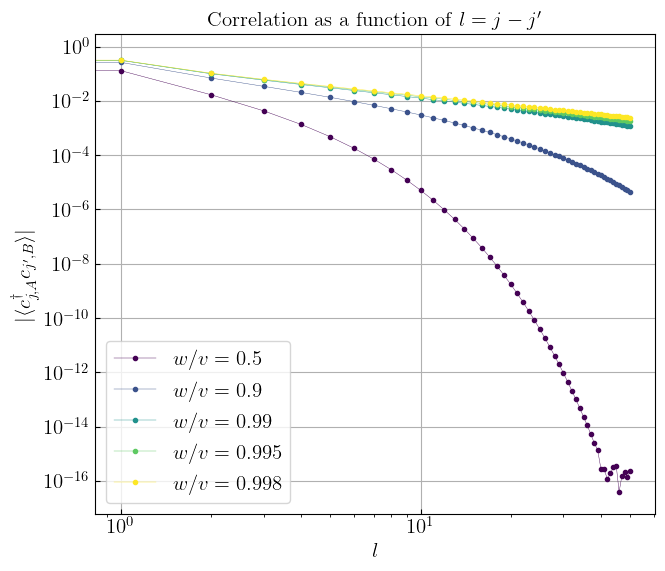

In [23]:
plot_correlation_data_as_distance_increase_loglogy()

## Energy dispersion and topology

In [24]:
def plot_ssh_band_structure_and_winding_number():
    # 1. Define parameters and k-space
    k = np.linspace(-np.pi, np.pi, 400)

    # We fix w = 1.0 as our energy scale and vary v
    w = 1.0
    v_values = [1.5, 1.0, 0.5]  # Trivial (v>w), Transition (v=w), Topological (v<w)
    labels = [r'Trivial ($v > w$)', r'Transition ($v = w$)', r'Topological ($v < w$)']
    colors = ['#1f77b4', '#2ca02c', '#d62728'] # Blue, Green, Red

    # 2. Function for Energy Dispersion
    def get_energy(k, v, w):
        return np.sqrt(v**2 + w**2 + 2*v*w*np.cos(k))

    # --- PLOT 1: Band Structures ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    for i, ax in enumerate(axes):
        v = v_values[i]
        E = get_energy(k, v, w)

        # Plot Valence and Co   nduction bands
        ax.plot(k, E, color=colors[i], lw=2, label=r'$E_+$')
        ax.plot(k, -E, color=colors[i], ls='--', lw=2, label=r'$E_-$')

        # Styling
        ax.set_title(labels[i], fontsize=22)
        ax.set_xlabel(r'Wavevector $k$', fontsize=24)
        ax.tick_params(axis='both', labelsize=15)
        ax.set_xlim(-np.pi, np.pi)
        ax.set_ylim(-3, 3)
        ax.grid(True, alpha=0.3)

        # Set x-ticks in units of pi
        ax.set_xticks([-np.pi, 0, np.pi])
        ax.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'], fontsize=24)

        # Mark the gap closing point
        if v == w:
            ax.scatter([np.pi, -np.pi], [0, 0], color='black', zorder=5)
            ax.text(0, 0.5, "Gap Closed", ha='center', fontsize=18)

        axes[0].set_ylabel(r'Energy $E/w$', fontsize=24)
        legend_handles, legend_labels = axes[0].get_legend_handles_labels()
        fig.subplots_adjust(top=0.77)
        fig.legend(legend_handles, legend_labels, loc='upper center', ncol=2, fontsize=18)
    
    # --- SAVE FIGURE 1 ---
    plt.savefig('ssh_band_structure_vec.svg', format='svg', bbox_inches='tight')
    plt.show()

    # --- PLOT 2: Winding Numbers (Topology) ---
    fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

    for i, ax in enumerate(axes2):
        v = v_values[i]

        # Calculate vector components
        dx = v + w * np.cos(k)
        dy = w * np.sin(k)

        # Plot the loop
        ax.plot(dx, dy, color=colors[i], lw=2)

        # Mark the Origin (0,0) - this is the singularity
        ax.plot(0, 0, 'kx', markersize=10, markeredgewidth=2, label='Origin')

        # Add arrows to show direction of winding
        mid_idx = len(k) // 2
        # Add a few arrows along the path
        arrow_indices = [len(k)//4, len(k)//2, 3*len(k)//4]
        for idx in arrow_indices:
            ax.arrow(dx[idx], dy[idx], dx[idx+1]-dx[idx], dy[idx+1]-dy[idx],
            head_width=0.1, color=colors[i])

        # Styling
        ax.set_title(labels[i], fontsize=22)
        ax.set_xlabel(r'$d_x(k)$', fontsize=24)
        ax.tick_params(axis='both', labelsize=18)
        ax.axhline(0, color='grey', lw=0.5)
        ax.axvline(0, color='grey', lw=0.5)
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')


    axes2[0].set_ylabel(r'$d_y(k)$', fontsize=24)
    # --- SAVE FIGURE 2 ---
    plt.savefig('ssh_winding_number_vec.svg', format='svg', bbox_inches='tight')
    plt.show()
    

In [25]:
def plot_ssh_dispersion_with_gap_annotation():
    # Parameters
    w = 1.0
    v = 0.7

    # k-range (zoom near the minimum gap at k = pi)
    kmin, kmax = 0, 2*np.pi   # <-- change to (0, np.pi/2) if you truly want that range
    k = np.linspace(kmin, kmax, 400)

    # Energy dispersion: E = ± sqrt(v^2 + w^2 + 2 v w cos k)
    E = np.sqrt(v**2 + w**2 + 2*v*w*np.cos(k))

    # Plot
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(k,  E, lw=2, label=r"$E_+(k)$")
    ax.plot(k, -E, lw=2, ls="--", label=r"$E_-(k)$")

    # Axis styling
    ax.set_xlim(kmin, kmax)
    ax.set_xlabel(r"Wavevector $k$", fontsize=20)
    ax.set_ylabel(r"Energy $E/w$", fontsize=20)
    ax.grid(True, alpha=0.3)

    # Nice pi-based ticks for this interval
    ax.set_xticks([kmin, np.pi, 2*np.pi])
    ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=13)

    # Gap arrow at k = pi
    k0 = np.pi
    Egap = abs(w - v)  # since E(pi) = |w - v|, the band gap is 2*|w-v|
    ax.annotate(
        "", xy=(k0, Egap), xytext=(k0, -Egap),
        arrowprops=dict(arrowstyle="<->", lw=2)
    )
    ax.text(k0 - 0.1, 0.0, "gap", fontsize=20, va="center", ha="right")

    ax.legend(frameon=False, fontsize=18)
    plt.tight_layout()
    plt.savefig("ssh_dispersion_gap.svg", format="svg", bbox_inches="tight")
    plt.show()

In [26]:
def plot_ssh_band_structure_separate_phases():
    # k-space
    k = np.linspace(-np.pi, np.pi, 400)

    # Parameters
    w = 1.0
    v_values = [1.5, 1.0, 0.5]
    colors = ['#1f77b4', '#2ca02c', '#d62728']

    labels = [
        r'\textbf{Trivial (}$\color{green}\mathbf{v} > \color{green}\mathbf{w}$\textbf{)}, $\mathbf{\gamma = 0}$',
        r'\textbf{Transition (}$\color{green}\mathbf{v} = \color{green}\mathbf{w}$\textbf{)}',
        r'\textbf{Topological (}$\color{green}\mathbf{v} < \color{green}\mathbf{w}$\textbf{)}, $\mathbf{\gamma = \pi}$',
    ]



    def get_energy(k, v, w):
        return np.sqrt(v**2 + w**2 + 2*v*w*np.cos(k))

    # ---- ONE CANVAS PER PHASE ----
    for v, title, col in zip(v_values, labels, colors):
        E = get_energy(k, v, w)

        fig, ax = plt.subplots(figsize=(6.5, 4.5))

        ax.plot(k,  E, color=col, lw=2, label=r"$E_+(k)$")
        ax.plot(k, -E, color=col, lw=2, ls="--", label=r"$E_-(k)$")

        ax.set_title(title, fontsize=26)
        ax.set_xlabel(r"Wavevector $k$", fontsize=22)
        ax.set_ylabel(r"Energy $E/w$", fontsize=22)
        ax.tick_params(axis="both", labelsize=18)

        ax.set_xlim(-np.pi, np.pi)
        ax.set_ylim(-3, 3)
        ax.grid(alpha=0.3)
        k0 = np.pi
        Egap = abs(w - v)  # since E(pi) = |w - v|, the band gap is 2*|w-v|
        ax.annotate(
            "", xy=(k0-0.1, Egap), xytext=(k0-0.1, -Egap),
            arrowprops=dict(arrowstyle="<->", lw=2)
        )
        ax.text(k0 - 0.4, 0.0, "gap", fontsize=24, va="center", ha="right")

        ax.set_xticks([-np.pi, 0, np.pi])
        ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"], fontsize=25)

        if np.isclose(v, w):
            ax.scatter([np.pi, -np.pi], [0, 0], color="black", zorder=5)
            ax.text(0, 0.7, "Gap Closed", ha="center", fontsize=13)

        ax.legend(frameon=False, fontsize=18)

        fig.savefig(f"ssh_band_v_{v:.1f}.svg", bbox_inches="tight")
        plt.show()
        plt.close(fig)

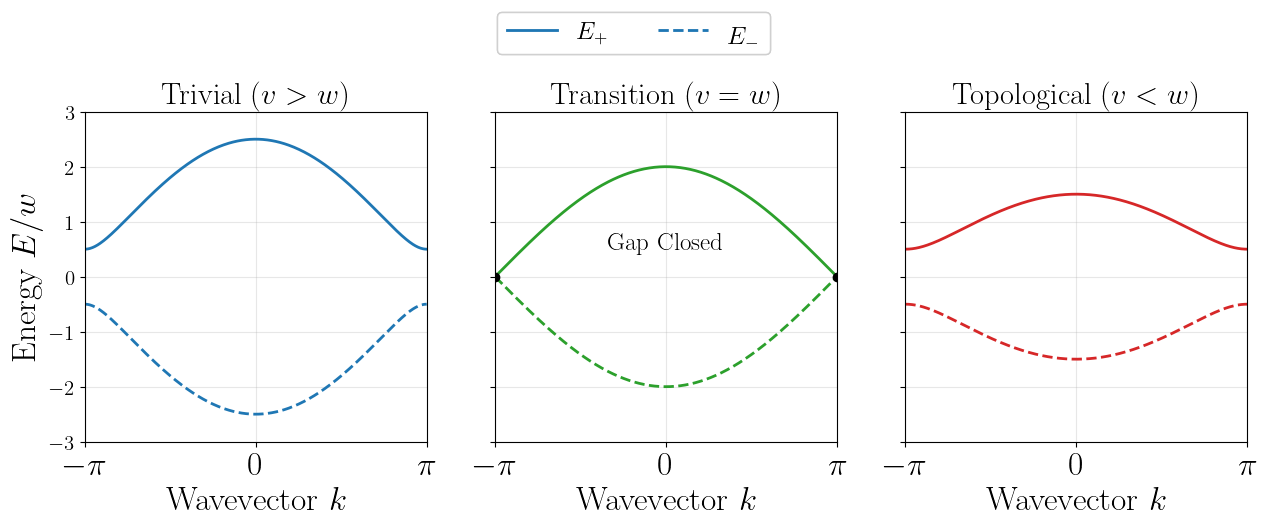

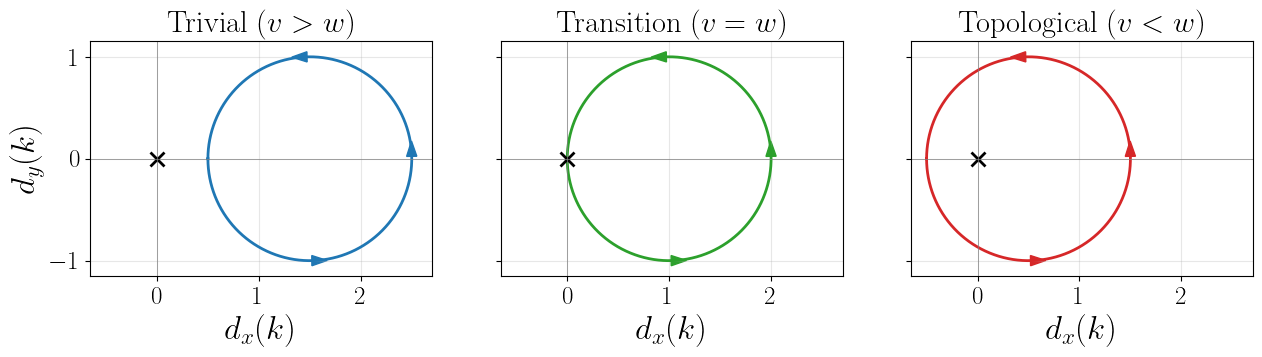

In [27]:
plot_ssh_band_structure_and_winding_number()

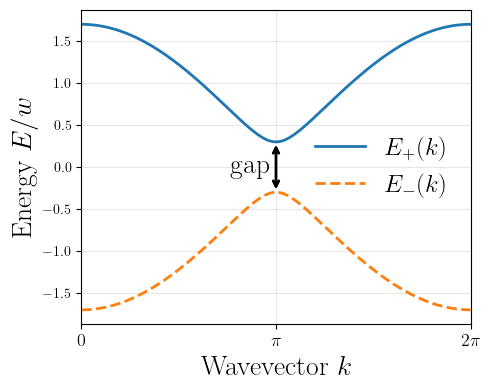

In [28]:
plot_ssh_dispersion_with_gap_annotation()

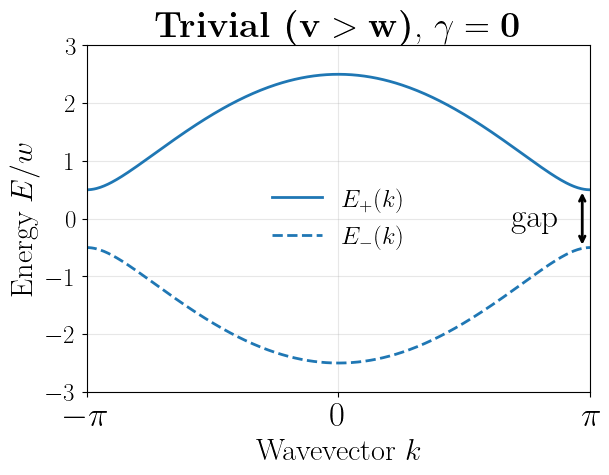

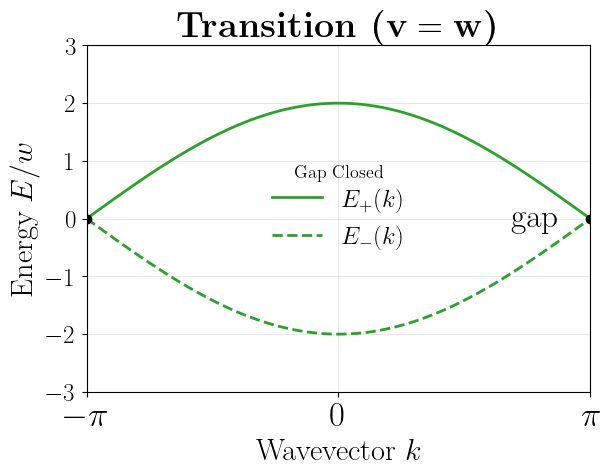

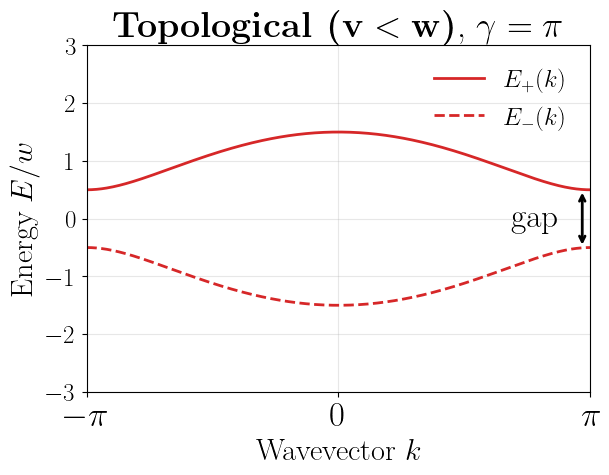

In [29]:
plot_ssh_band_structure_separate_phases()

## Entropy-Variance ratio against band gap

In [30]:
# def plot_ssh_and_rm_entropy_small_gaps():
#     gap = 10 ** np.linspace(-10, -1, 20)
#     entropy_ssh_20 = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_ssh_1e-10_filling_fraction20percent.txt")
#     entropy_rm_20  = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_rm_1e-10_filling_fraction20percent.txt")
#     variance_ssh_20 = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_ssh_1e-10_filling_fraction20percent.txt")
#     variance_rm_20  = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_rm_1e-10_filling_fraction20percent.txt")
#     entropy_ssh_half = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_ssh_1e-10_half_filling.txt")
#     entropy_rm_half  = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_rm_1e-10_half_filling.txt")
#     variance_ssh_half = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_ssh_1e-10_half_filling.txt")
#     variance_rm_half  = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_rm_1e-10_half_filling.txt")


#     fig = plt.figure(figsize=(9, 9), dpi=100)
#     spec = gridspec.GridSpec(ncols=2, nrows=2)
#     ax1 = fig.add_subplot(spec[0, 0])
#     ax2 = fig.add_subplot(spec[0, 1])
#     ax3 = fig.add_subplot(spec[1, 0])
#     ax4 = fig.add_subplot(spec[1, 1])

#     # Main curves
#     ax1.semilogx(gap, entropy_ssh_20, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
#     ax1.semilogx(gap, entropy_rm_20, color="red", marker='o', markersize=3, label=r"RM Model, $w= 1$,$v=1$, $u=gap/2$")
#     ax2.semilogx(gap, variance_ssh_20, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
#     ax2.semilogx(gap, variance_rm_20, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")
#     ax3.semilogx(gap, entropy_ssh_half, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
#     ax3.semilogx(gap, entropy_rm_half, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")
#     ax4.semilogx(gap, variance_ssh_half, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
#     ax4.semilogx(gap, variance_rm_half, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")

#     # Labels & title
#     ax1.set_title(r"Entropy vs Gap - 20\% filling", fontsize=15)
#     ax1.set_xlabel(r"Gap", fontsize=15)
#     ax1.set_ylabel(r"Entropy $S$", fontsize=15)
#     ax2.set_title(r"Variance vs Gap - 20\% filling", fontsize=15)
#     ax2.set_xlabel(r"Gap", fontsize=15)
#     ax2.set_ylabel(r"Variance $\Delta N_{A}$", fontsize=15)
#     ax3.set_title(r"Entropy vs Gap - Half filling", fontsize=15)
#     ax3.set_xlabel(r"Gap", fontsize=15)
#     ax3.set_ylabel(r"Entropy $S$", fontsize=15)
#     ax4.set_title(r"Variance vs Gap - Half filling", fontsize=15)
#     ax4.set_xlabel(r"Gap", fontsize=15)
#     ax4.set_ylabel(r"Variance $\Delta N_{A}$", fontsize=15)
#     ax1.text(1e-9 , 2.3158,r"$N_A = 300$", fontsize=13)

#     # Fine grid (major + minor)
#     ax1.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
#     ax1.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
#     ax1.minorticks_on()
#     ax2.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
#     ax2.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
#     ax2.minorticks_on()
#     ax3.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
#     ax3.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
#     ax3.minorticks_on()
#     ax4.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
#     ax4.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
#     ax4.minorticks_on()

#     # Tick formatting
#     ax1.tick_params(direction="in", which='both', labelsize=13)
#     ax1.legend(loc="best", fontsize=10)
#     ax2.tick_params(direction="in", which='both', labelsize=13)
#     ax2.legend(loc="best", fontsize=10)
#     ax3.tick_params(direction="in", which='both', labelsize=13)
#     ax3.legend(loc="best", fontsize=10)
#     ax4.tick_params(direction="in", which='both', labelsize=13)
#     ax4.legend(loc="best", fontsize=10) 

#     # Save + show
#     fig.tight_layout()
#     plt.show()
#     fig.savefig(plot_dir / "ssh_and_rm_entropy_variance_vs_gap_1e-10.pdf",
#                 bbox_inches='tight')

In [31]:
def plot_ratio_entropy_variance_vs_gap_insulating_phase600():
    # --- 1. Setup Data ---
    # Recreate the gap vector exactly as in your Julia code
    # Julia: 10 .^ range(log10(0.03), log10(0.3); length=15)
    gap = np.concatenate([
    [0.005, 0.008, 0.01, 0.02],
    10 ** np.linspace(np.log10(0.02), np.log10(0.3), 10)[1:]
    ])

    # --- 2. Load Your Results ---
    # Replace 'PATH_TO_FILE' with your actual file paths.
    # Assuming standard space/tab separated files from Julia's readdlm/writedlm.
    # If you haven't saved them yet, you can manually paste the vectors here.

    try:
        # Example loading (Uncomment and adjust paths):
        Ratio_SSH = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_ssh_600cells_newgap.txt")
        Ratio_RM  = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_rm_600cells_newgap.txt")
    
        # If the file contains multiple columns (e.g., gap column 1, data column 2), use usecols=...
        # Ratio_SSH = np.loadtxt("...", usecols=0) 
        pass 
    except OSError:
        print("Could not find data files. Please check paths.")
        # For testing the plot script, here are dummy placeholders:
        Ratio_SSH = np.linspace(3.29, 3.0, 15) 
        Ratio_RM  = np.linspace(3.29, 2.8, 15)

    # --- 3. Plotting ---
    plt.figure(figsize=(8, 6))

    # Plot SSH
    plt.semilogx(gap, Ratio_SSH, 'o-', label='S-S-H Model', color='blue', linewidth=2, markersize=6)

    # Plot Rice-Mele
    plt.semilogx(gap, Ratio_RM, 's-', label='R-M Model', color='red', linewidth=2, markersize=6)

    ax = plt.gca()
    ax.set_axisbelow(True)

    ax.grid(True, which='major', axis='both', alpha=0.4)
    ax.grid(True, which='minor', axis='y', alpha=0.2)  # optional: keep minor horizontals
    ax.grid(False, which='minor', axis='x')             # remove minor verticals


    # THEN gradient-like conducting / critical region shading
    x_left = 0.005
    x_right = 0.01
    n_steps = 20

    xs = np.logspace(np.log10(x_left), np.log10(x_right), n_steps)

    for i in range(len(xs) - 1):
        alpha = 0.02 + 0.55 * np.exp(-3 * i / (len(xs) - 1))
        ax.axvspan(
            xs[i], xs[i + 1],
            facecolor='#4C72B0',
            alpha=alpha,
            zorder=2,
            edgecolor='none',
            linewidth=0,
        )

    # Label inside shaded region
    ax.text(
        0.007
        , 3.6,      # adjust y slightly if needed
        'Criticality',
        fontsize=15,
        color='black',
        ha='center',
        va='center',
        bbox=dict(
            facecolor='white',
            edgecolor='black',
            boxstyle='round,pad=0.3',
            alpha=0.7
        )
    )
    ax.text(
        0.02, 3.6,      # adjust y slightly if needed
        'Insulating phase',
        fontsize=15,
        color='black',
        ha='center',
        va='center',
        bbox=dict(
            facecolor='white',
            edgecolor='black',
            boxstyle='round,pad=0.3',
            alpha=0.7
        )
    )



    # Add CFT Theoretical Limit line (pi^2 / 3)
    cft_limit = (np.pi**2) / 3
    plt.axhline(y=cft_limit, color='black', linestyle='--', linewidth=1.5, label=r'Univ. critical limit ($\pi^2/3 \approx 3.29$)')


    # --- 4. Styling ---
    plt.xlabel(r'Gap size ($\Delta / w$)', fontsize=15)
    plt.ylabel(r'Ratio $S / \Delta N_A^2$', fontsize=15)
    plt.legend(fontsize=14)

    # Make axis ticks look nice
    plt.tick_params(axis='both', which='major', labelsize=13)

    plt.tight_layout()

    # Save and Show
    plt.savefig('ratio_SV_vs_gap_insulating_phase_600_new_gap.svg', bbox_inches='tight')
    plt.show()

    print("First 3 SSH values:", Ratio_SSH[:3])

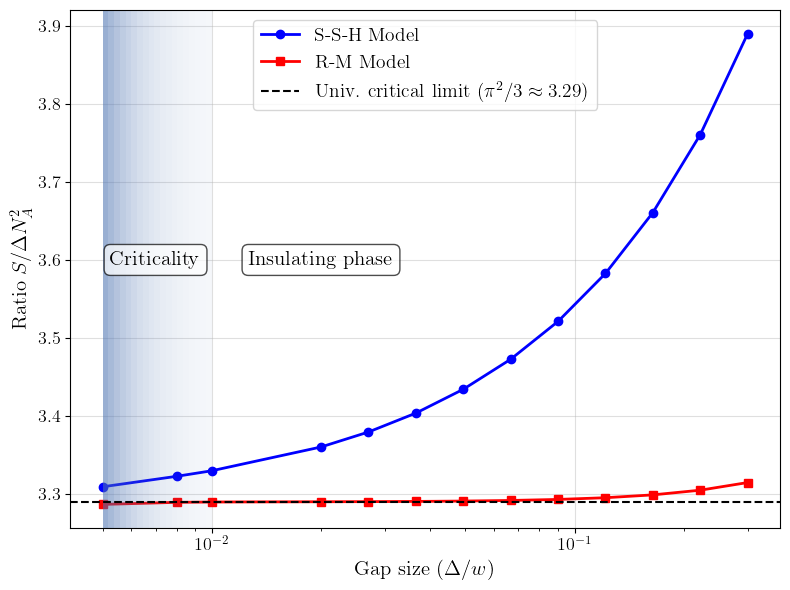

First 3 SSH values: [3.30925399 3.32267923 3.32979726]


In [32]:
plot_ratio_entropy_variance_vs_gap_insulating_phase600()

In [33]:
def plot_charge_gap_SSH():
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.read_csv(data_equilibrium_dir/"charge_gap_OBC_free_scan.csv")

    plt.figure(figsize=(6,4))

    # Interacting curve: thinner, muted
    plt.plot(
        df["V"], df["DeltaC"],
        marker="o", lw=1.2, ms=4,
        alpha=0.7,
        label="Interacting SSH"
    )

    # Free SSH point: larger, solid, on top
    df0 = df[df["V"] == 0.0]
    plt.scatter(
        df0["V"], df0["DeltaC"],
        s=120,
        edgecolors="black",
        linewidths=1.0,
        zorder=5,
        label="Free SSH ($V=0$)"
    )

    # Annotate the free point
    x0 = df0["V"].iloc[0]
    y0 = df0["DeltaC"].iloc[0]
    plt.annotate(
        "free SSH gap",
        xy=(x0, y0),
        xytext=(0.05, 1.2*y0),
        arrowprops=dict(arrowstyle="->", lw=0.9),
        fontsize=12
    )

    plt.xlabel(r"Interaction $(V/w)$", fontsize=16)
    plt.ylabel(r"Charge gap $(\text{gap}/w)$", fontsize=16)

    plt.grid(True, which="major", alpha=0.25)
    plt.legend(frameon=False, fontsize=15)
    plt.tight_layout()

    plt.savefig(plot_dir/"charge_gap_vs_interaction.svg", bbox_inches="tight")
    plt.show()


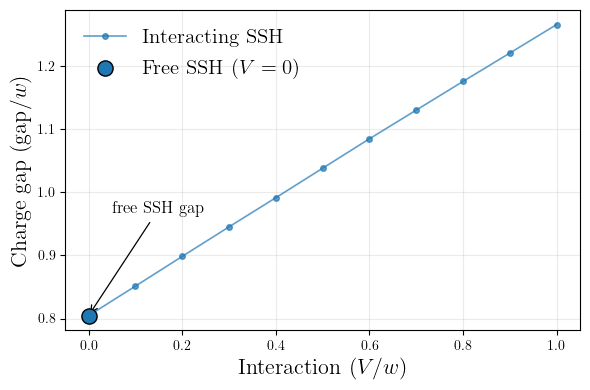

In [34]:
plot_charge_gap_SSH()

In [35]:
def plot_scaled_charge_gap_SSH():
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.read_csv(data_equilibrium_dir/"charge_gap_multiN.csv")

    plt.figure(figsize=(6,4))

    for N, g in df.groupby("N"):
        plt.plot(
            g["V"], 
            N * g["DeltaC"],
            marker= "o",
            ms=4,
            lw=0.8,
            label=f"N={N}"
        )

    plt.axvline(2.0, ls="--", color="k", alpha = 0.5)

    plt.xlabel(r"Interaction $(V/w)$", fontsize=16)
    plt.ylabel(r"$N\, \text{gap}_c(N)$", fontsize=16)
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig(plot_dir/"scaled_charge_gap_vs_interaction.svg", bbox_inches="tight")


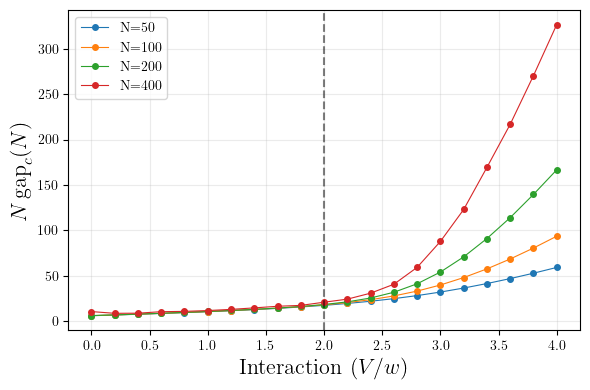

<Figure size 640x480 with 0 Axes>

In [36]:
plot_scaled_charge_gap_SSH()

## Quench dynamics 

In [37]:
def comparison_data_entropy_vs_var_quench():

    fig = plt.figure(figsize=(6, 5))
    spec = gridspec.GridSpec(ncols=1, nrows=1)
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = ax1.twinx()

    direction1 = data_quench_dir / "entropy_200_cells_noflux.txt"
    direction2 = data_quench_dir / "variance_200_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var  = np.loadtxt(direction2)
    tau = np.arange(len(Entr)) * 0.4

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    l1, = ax1.plot(tau, Entr, color="red", label=r"Entropy $S(t)$")
    l2, = ax2.plot(tau, Var, color="cornflowerblue", label=r"Variance $\Delta N_{A}^2(t)$")

    ax1.set_ylabel(r"$S(t)$", fontsize=20, color="red")
    ax2.set_ylabel(r"$\Delta N_{A}^2(t)$", fontsize=20, color="cornflowerblue")
    ax1.set_xlabel(r"$\tau$", fontsize=20)

    leg = ax1.legend(handles=[l1, l2], loc="best", fontsize=18, frameon=False)

    for text, color in zip(leg.get_texts(), ["red", "cornflowerblue"]):
        text.set_color(color)

    # ---- GRID (same as before) ----
    ax1.grid(True, which="both", alpha=0.3)

    fig.savefig(plot_dir / "entropy_vs_variance_bigsize_vec.svg",
                bbox_inches="tight")


In [38]:
def comparison_data_entropy_vs_var_quench_1():

    fig = plt.figure(figsize=(6, 5))
    spec = gridspec.GridSpec(ncols=1, nrows=1)
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = ax1.twinx()

    direction1 = data_quench_dir / "entropy_40_cells_noflux.txt"
    direction2 = data_quench_dir / "variance_40_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var  = np.loadtxt(direction2)
    tau = np.arange(len(Entr)) * 0.4

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    l1, = ax1.plot(tau, Entr, color="red", label=r"Entropy $S(t)$")
    l2, = ax2.plot(tau, Var,  color="cornflowerblue",
               label=r"Variance $\Delta N_A^2(t)$")


    ax1.set_ylabel(r"$S(t)$", fontsize=20, color="red")
    ax2.set_ylabel(r"$\Delta N_{A}^2(t)$", fontsize=20, color="cornflowerblue")
    ax1.set_xlabel(r"$\tau$", fontsize=20)

    leg = ax1.legend(handles=[l1, l2],
                 loc="best",
                 fontsize=18,
                 frameon=False)

    for text, color in zip(leg.get_texts(), ["red", "cornflowerblue"]):
        text.set_color(color)
    

    # ---- GRID (put it on ax1 only) ----
    ax1.grid(True, which="both", alpha=0.3)

    fig.savefig(plot_dir / "entropy_vs_variance_midsize_vec.svg",
                bbox_inches="tight")


In [43]:
def comparison_data_entropy_vs_var_quench_flux():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system with flux, quench $t=0$", fontsize=20)
    direction1 = data_quench_dir/"entropy_40_cells_with_flux.txt"
    direction2 = data_quench_dir/"variance_40_cells_with_flux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)
    tau = np.arange(len(Entr)) * 0.4

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    l2, = ax2.plot(tau, Var, color = "cornflowerblue", label = r"Variance $\Delta N_{A}(t)$")
    l1, = ax1.plot(tau, Entr, color = "red", label = r"Entropy $S(t)$")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "cornflowerblue")
    ax1.set_xlabel(r"$\tau$", fontsize = 20)

    leg = ax1.legend(handles=[l1, l2],
                 loc="best",
                 fontsize=18,
                 frameon=False)
    for text, color in zip(leg.get_texts(), ["red", "cornflowerblue"]):
        text.set_color(color)

    ax1.text(60,3, r"$N = 80,\,\, N_{A} = 40, \phi \sim 0.0098 $", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)
    ax1.grid(True, which = "both", alpha = 0.3)

    fig.savefig(plot_dir/"entropy_vs_variance_with_flux_midsize.pdf", bbox_inches = 'tight')

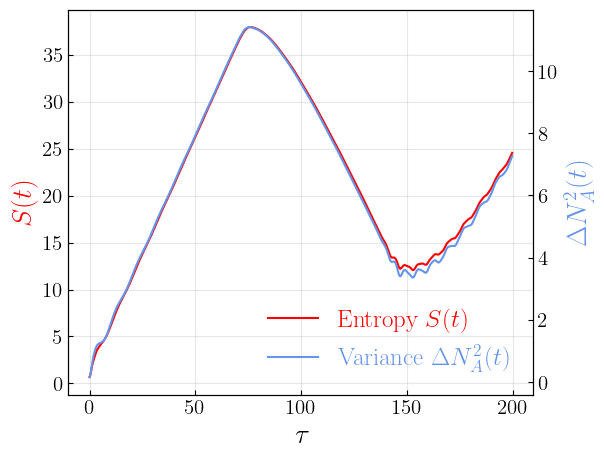

In [44]:
comparison_data_entropy_vs_var_quench()

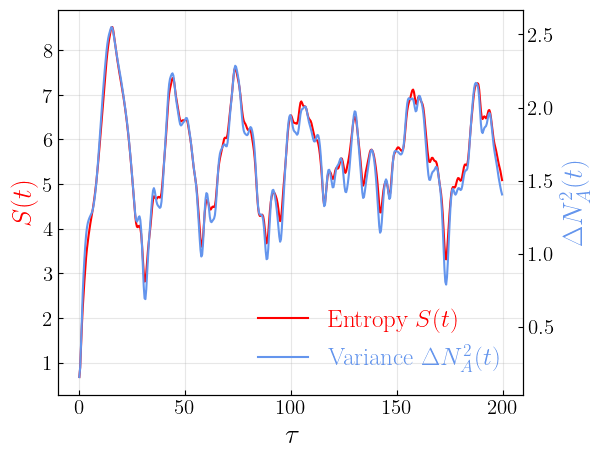

In [45]:
comparison_data_entropy_vs_var_quench_1()

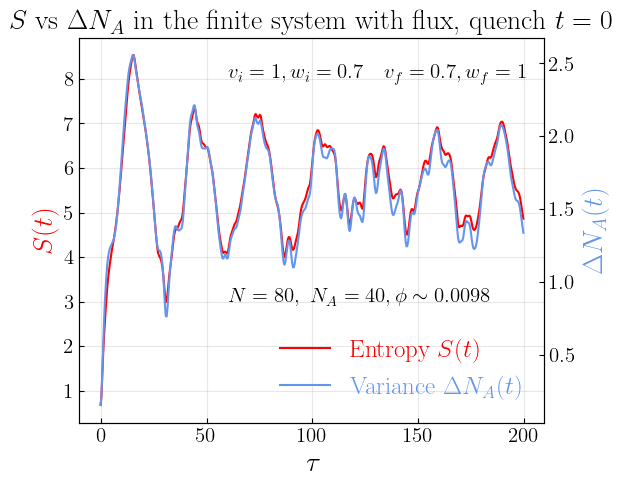

In [46]:
comparison_data_entropy_vs_var_quench_flux()